In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
import ast

In [2]:
def load_result(filename):
    """Loads results from specified file"""
    inputs = open(filename, "r")
    lines = inputs.readlines()
    ls = []
    for line in lines:
        ls.append(ast.literal_eval(line))
    return ls

In [3]:
def plot_error(mean_error, experiment):
    """Plot Generalization Errors for experiment type (RXOR or XNOR)"""
    algorithms = [
        "Stream Synergistic Forest",
        "Stream Decision Forest",
        "Batch Synergistic Forest",
        "Batch Decision Forest"
    ]
    fontsize = 30
    labelsize = 28
    ls = ["-", "--"]
    colors = sns.color_palette("bright")
    fig = plt.figure(figsize=(21, 14))
    gs = fig.add_gridspec(14, 21)
    ax1 = fig.add_subplot(gs[7:, :6])
    # Stream Synergistic Forest XOR
    ax1.plot(
        (100 * np.arange(0.25, 15, step=0.25)).astype(int),
        mean_error[0],
        label=algorithms[0],
        c=colors[3],
        ls=ls[1],
        lw=3,
    )
    # Stream Decision Forest XOR
    ax1.plot(
        (100 * np.arange(0.25, 15, step=0.25)).astype(int),
        mean_error[2],
        label=algorithms[1],
        c=colors[2],
        ls=ls[1],
        lw=3,
    )
    # Batch Synergistic Forest XOR
    ax1.plot(
        (100 * np.arange(0.25, 15, step=0.25)).astype(int),
        mean_error[4],
        label=algorithms[2],
        c=colors[3],
        ls=ls[0],
        lw=3,
    )
    # Batch Decision Forest XOR
    ax1.plot(
        (100 * np.arange(0.25, 15, step=0.25)).astype(int),
        mean_error[6],
        label=algorithms[3],
        c=colors[2],
        ls=ls[0],
        lw=3,
    )

    ax1.set_ylabel("Generalization Error (XOR)", fontsize=fontsize)
    ax1.set_xlabel("Total Sample Size", fontsize=fontsize)
    ax1.tick_params(labelsize=labelsize)
    ax1.set_yscale("log")
    ax1.yaxis.set_major_formatter(ScalarFormatter())
    ax1.set_yticks([0.1, 0.3, 0.5, 0.9])
    ax1.set_xticks([0, 750, 1500])
    ax1.axvline(x=750, c="gray", linewidth=1.5, linestyle="dashed")
    ax1.axvline(x=1500, c="gray", linewidth=1.5, linestyle="dashed")

    right_side = ax1.spines["right"]
    right_side.set_visible(False)
    top_side = ax1.spines["top"]
    top_side.set_visible(False)

    ax1.text(200, np.mean(ax1.get_ylim()) + 0.5, "XOR", fontsize=26)
    ax1.text(850, np.mean(ax1.get_ylim()) + 0.5, experiment, fontsize=26)


    ######## RXOR
    ax1 = fig.add_subplot(gs[7:, 8:14])
    rxor_range = (100 * np.arange(0.25, 15, step=0.25)).astype(int)[30:]
    # Stream Synergistic Forest RXOR
    ax1.plot(
        rxor_range,
        mean_error[1, 30:],
        label=algorithms[0],
        c=colors[3],
        ls=ls[1],
        lw=3,
    )
    # Stream Decision Forest RXOR
    ax1.plot(
        rxor_range,
        mean_error[3, 30:],
        label=algorithms[1],
        c=colors[2],
        ls=ls[1],
        lw=3,
    )
    # Batch Synergistic Forest RXOR
    ax1.plot(
        rxor_range,
        mean_error[5, 30:],
        label=algorithms[2],
        c=colors[3],
        ls=ls[0],
        lw=3,
    )
    # Batch Decision Forest RXOR
    ax1.plot(
        rxor_range,
        mean_error[7, 30:],
        label=algorithms[3],
        c=colors[2],
        ls=ls[0],
        lw=3,
    )
    ax1.set_ylabel("Generalization Error (%s)" % experiment, fontsize=fontsize)
    ax1.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", fontsize=20, frameon=False)
    ax1.set_xlabel("Total Sample Size", fontsize=fontsize)
    ax1.tick_params(labelsize=labelsize)
    ax1.set_yscale("log")
    ax1.yaxis.set_major_formatter(ScalarFormatter())
    ax1.set_yticks([0.1, 0.3, 0.5, 0.9])
    ax1.set_xticks([0, 750, 1500])
    ax1.axvline(x=750, c="gray", linewidth=1.5, linestyle="dashed")
    ax1.axvline(x=1500, c="gray", linewidth=1.5, linestyle="dashed")
    right_side = ax1.spines["right"]
    right_side.set_visible(False)
    top_side = ax1.spines["top"]
    top_side.set_visible(False)

    ax1.text(200, np.mean(ax1.get_ylim()) + 0.5, "XOR", fontsize=26)
    ax1.text(850, np.mean(ax1.get_ylim()) + 0.5, experiment, fontsize=26)

In [4]:
prefixes = ["stream_synf/", "sdf/", "batch_synf/", "df/"]
rxor_mean_errors = []
for prefix in prefixes: 
    xor_error = load_result(prefix + "rxor_exp_xor_error.txt")
    rxor_error = load_result(prefix + "rxor_exp_r_xor_error.txt")
    rxor_mean_errors.append(xor_error)
    rxor_mean_errors.append(rxor_error)


# RXOR Experiment

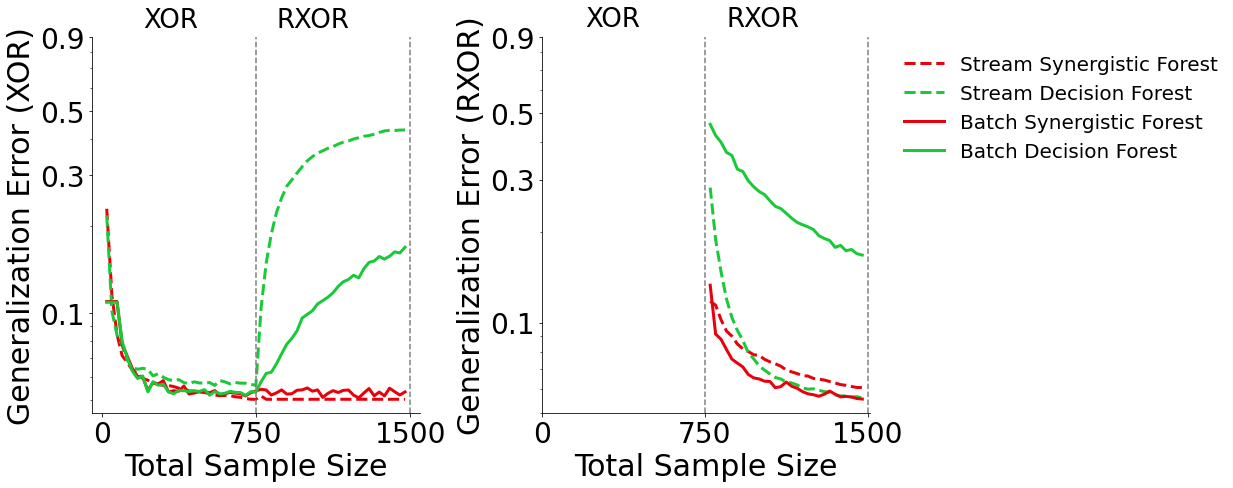

In [5]:
plot_error(np.array(rxor_mean_errors), "RXOR")

In [6]:
xnor_mean_errors = []
for prefix in prefixes:
    xor_error = load_result(prefix + "xnor_exp_xor_error.txt")
    xnor_error = load_result(prefix + "xnor_exp_xnor_error.txt")
    xnor_mean_errors.append(xor_error)
    xnor_mean_errors.append(xnor_error)

# XNOR Experiment

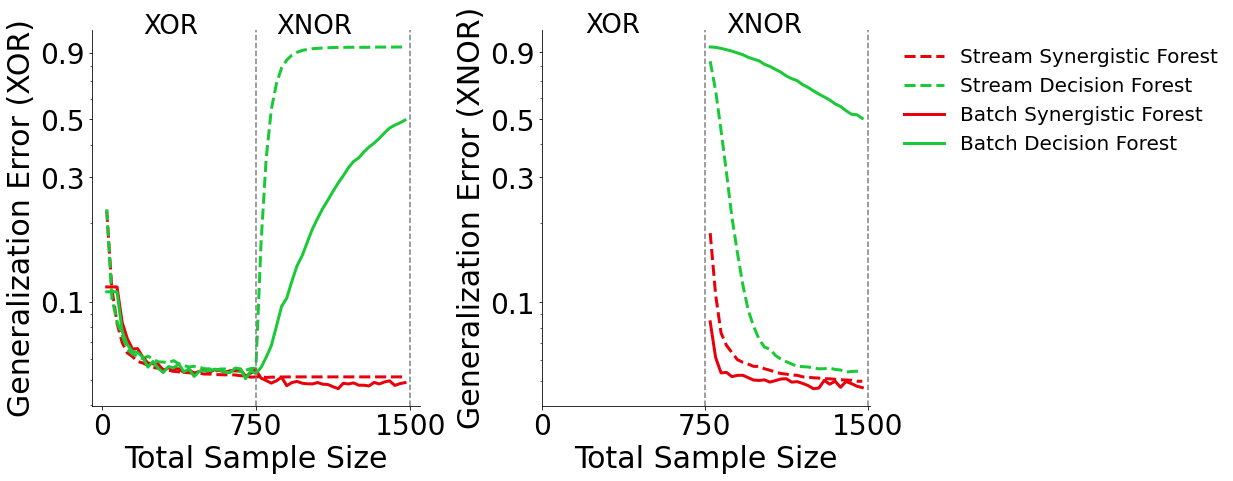

In [7]:
plot_error(np.array(xnor_mean_errors), "XNOR")